Clustering: Hierarchical
Dataset : hitters.csv
Apply Data pre-processing (Label Encoding , Data
Transformation....) techniques if necessary.
Apply Hierarchical clustering algorithms (based on CRuns column) to
find the group of players.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('/content/Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.shape

(322, 20)

In [6]:
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df.isna().sum().sum()

0

In [10]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League         int64
Division       int64
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['League'] = lb.fit_transform(df['League'])
df['Division'] = lb.fit_transform(df['Division'])

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(df[['CRuns']])

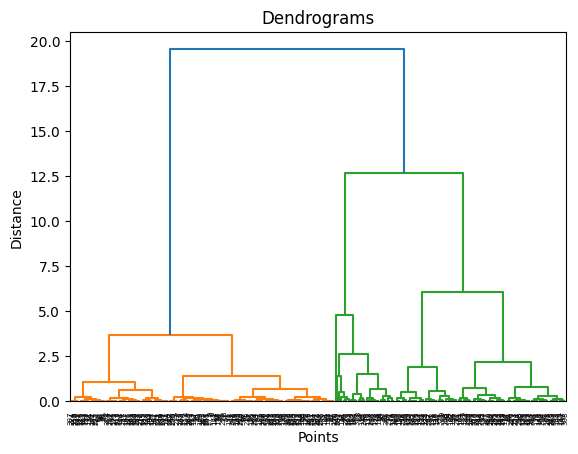

In [22]:
dendro = dendrogram(linkage(x, method="ward"))
plt.title("Dendrograms")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

In [25]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity="euclidean")
y_pred = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
df['label'] = y_pred

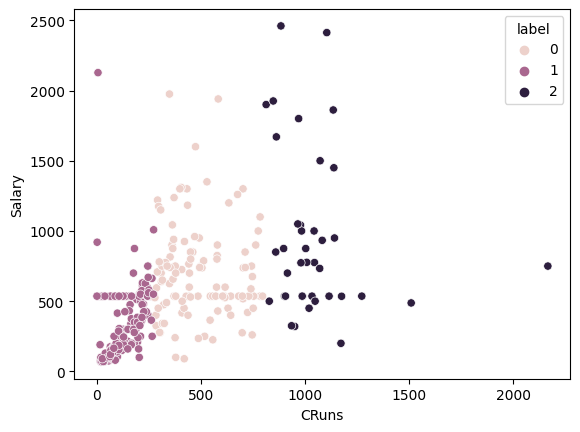

In [29]:
sns.scatterplot(y=df['Salary'], x=df['CRuns'], hue=df['label'])
plt.show()